https://www.perplexity.ai/search/83b26786-5e8e-4cbe-ac68-acf4626be7c8

In [1]:
import pandas as pd
from pandas import DataFrame
import os


#參數愈多,function就愈靈活
def concatenate(folder_abspath:str,filename:str)->DataFrame:
    """
    可以組合台鐵進出站的資訊
    param:
        folder_abspath:"所在資料夾的絕對位置"
        filename:"檔案名稱"
    return:
        傳出DataFrame
    """

    csv_absPath = os.path.join(folder_abspath,filename)
    df = pd.read_csv(csv_absPath)
    site_df = pd.read_csv(os.path.abspath('台鐵車站資訊.csv'))
    df1 = pd.merge(df,site_df,left_on='staCode',right_on='stationCode',how='left')
    df2 = df1.reindex(columns=['trnOpDate','staCode','gateInComingCnt','gateOutGoingCnt','name','stationAddrTw','gps','haveBike'])
    df3 = df2.rename(columns={'trnOpDate':'日期',
                    'staCode':'代碼',
                    'gateInComingCnt':'進站人數',
                    'gateOutGoingCnt':'出站人數',
                    'name':'站名',
                    'stationAddrTw':'地址',
                    'gps':'gps',
                    'haveBike':'youBike'
                    })
    df4 = df3.dropna()
    df4['日期'] = pd.to_datetime(df4['日期'].astype(str))
    return df4

In [2]:
folder_name = '每日各站進出站人數'
folder_abspath = os.path.abspath(folder_name)
allitems:list[str] = os.listdir(folder_abspath)
filenames = [file_name for file_name in allitems if len(file_name) > 12]
all_data:list[DataFrame] = [concatenate(folder_abspath,filename) for filename in filenames]
combine_datas = pd.concat(all_data,ignore_index=True)
combine_datas

,日期,代碼,進站人數,出站人數,站名,地址,gps,youBike
0,2021-01-01,900,7223,7425,基隆,基隆市仁愛區港西街5號,25.13411 121.73997,Y
1,2021-01-01,910,972,1100,三坑,基隆市仁愛區德厚里龍安街 206 號,25.12305 121.74202,Y
2,2021-01-01,920,1505,1698,八堵,基隆市暖暖區八南里八堵路 142 號,25.10843 121.72898,Y
3,2021-01-01,930,4385,4657,七堵,基隆市七堵區長興里東新街 2 號,25.09294 121.71415,Y
4,2021-01-01,940,1785,1967,百福,基隆市七堵區堵南里明德三路 1 之 1 號,25.07795 121.69379,N
...,...,...,...,...,...,...,...,...
406756,2023-12-31,7360,7916,8252,瑞芳,新北市瑞芳區龍潭里明燈路三段 82 號,25.10861 121.80596,Y
406757,2023-12-31,7361,164,195,海科館,基隆市中正區長潭里,25.13754 121.79997,N
406758,2023-12-31,7362,652,720,八斗子,新北市瑞芳區建基路2段121號隔壁 砂子里省道臺 2 線 (與新北市瑞芳區交界處、無站房),25.13545 121.80261,N
406759,2023-12-31,7380,1526,656,四腳亭,新北市瑞芳區吉慶里中央路 65 號,25.10283 121.76192,N


In [3]:
sort_datas:DataFrame = combine_datas.sort_values(by='日期')
sort_datas1:DataFrame = sort_datas.set_index('日期')
sort_datas1

,代碼,進站人數,出站人數,站名,地址,gps,youBike
日期,,,,,,,
2019-04-23,6100,22,16,東里,花蓮縣富里鄉東里村大莊路 15 之 6 號,23.27233 121.30425,Y
2019-04-23,5070,533,424,南州,屏東縣南州鄉仁里村仁里路 86 號,22.49207 120.51174,Y
2019-04-23,5080,15,14,鎮安,屏東縣林邊鄉鎮安村永和路 4 號,22.45794 120.51151,N
2019-04-23,5090,368,325,林邊,屏東縣林邊鄉仁和村仁愛路 33 號,22.43141 120.51538,Y
2019-04-23,5100,95,95,佳冬,屏東縣佳冬鄉六根村復興路21號,22.41416 120.54782,N
...,...,...,...,...,...,...,...
2023-12-31,3350,1229,3101,成功,臺中市烏日區榮泉里中山路三段 550 號,24.11424 120.59021,Y
2023-12-31,3360,19617,16699,彰化,彰化縣彰化市長樂里三民路 1 號,24.08177 120.53854,Y
2023-12-31,3370,1864,1532,花壇,彰化縣花壇鄉花壇村中正路 370 號,24.08173 120.53833,Y


In [4]:
sort_datas1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 406761 entries, 2019-04-23 to 2023-12-31
Data columns (total 7 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   代碼       406761 non-null  int64 
 1   進站人數     406761 non-null  int64 
 2   出站人數     406761 non-null  int64 
 3   站名       406761 non-null  object
 4   地址       406761 non-null  object
 5   gps      406761 non-null  object
 6   youBike  406761 non-null  object
dtypes: int64(3), object(4)
memory usage: 24.8+ MB


### 可以把sort_datas1當作是記憶體的資料庫

In [5]:
sort_datas1.loc['2019-04-23']
sort_datas1.loc['2019-04']
sort_datas1.loc['2019']
sort_datas1.loc['2019-04-23':'2019-04-25']
sort_datas1.loc['2019-04':'2019-05']

,代碼,進站人數,出站人數,站名,地址,gps,youBike
日期,,,,,,,
2019-04-23,6100,22,16,東里,花蓮縣富里鄉東里村大莊路 15 之 6 號,23.27233 121.30425,Y
2019-04-23,5070,533,424,南州,屏東縣南州鄉仁里村仁里路 86 號,22.49207 120.51174,Y
2019-04-23,5080,15,14,鎮安,屏東縣林邊鄉鎮安村永和路 4 號,22.45794 120.51151,N
2019-04-23,5090,368,325,林邊,屏東縣林邊鄉仁和村仁愛路 33 號,22.43141 120.51538,Y
2019-04-23,5100,95,95,佳冬,屏東縣佳冬鄉六根村復興路21號,22.41416 120.54782,N
...,...,...,...,...,...,...,...
2019-05-31,3300,27034,26186,臺中,臺中市中區綠川里臺灣大道一段 1 號,24.13747 120.68691,Y
2019-05-31,3290,1125,1153,精武,臺中市東區東南里東光路 161號,24.14928 120.69777,Y
2019-05-31,3280,3341,3323,太原,臺中市北屯區北興里東光路 665 號,24.16449 120.69988,Y


In [6]:
site_name = '頭家厝'
site_info:DataFrame = sort_datas1.loc['2019-05'].query('站名==@site_name')

In [7]:
%pip install wget

Note: you may need to restart the kernel to use updated packages.


In [8]:
import wget
wget.download("https://github.com/roberthsu2003/machine_learning/raw/refs/heads/main/source_data/ChineseFont.ttf")

'ChineseFont.ttf'

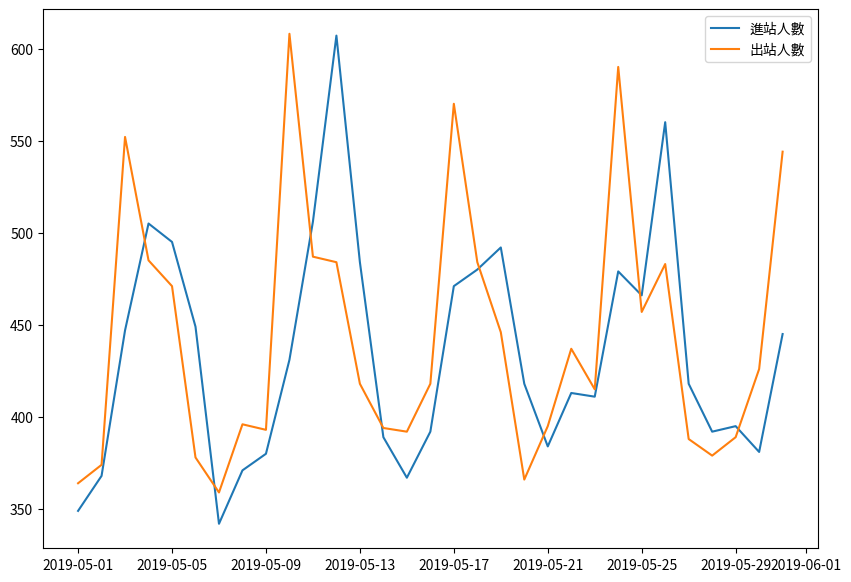

In [9]:
import matplotlib as mpl
from matplotlib.font_manager import fontManager
import matplotlib.pyplot as plt

fontManager.addfont("ChineseFont.ttf")
mpl.rc('font', family="ChineseFont")
plt.figure(figsize=(10,7))
plt.plot(site_info.index,site_info["進站人數"],label="進站人數")
plt.plot(site_info.index,site_info["出站人數"],label="出站人數")
plt.legend()
plt.show()